# Principal Component Analysis with Cancer Data

In [148]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [149]:
df = pd.read_csv('breast-cancer-wisconsin-data.csv')
df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [150]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [151]:
print(df.info())
print(df.shape)
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB
None
(699, 11)
                 ID  ClumpThickness   Cell Size  Cell Shape  \
count  6.990000e+02      699.000000  699.000000  699.000000   
mean   1.071704e+06        4.417740    3.134478    3.207439   
std    6.170957e+05        2.815741    3.051459    2.971913   
min    6.163400e+04      

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']
I can see ? at some places, we will have to replace them.
there is no missing value


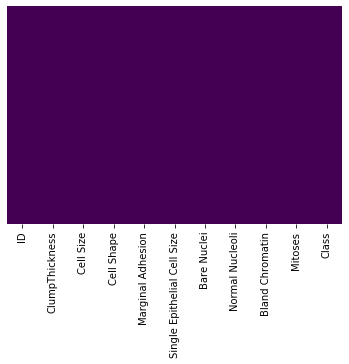

In [152]:
# We could see "?" values in column, this should be removed from data set
print(df['Bare Nuclei'].unique())
print('I can see ? at some places, we will have to replace them.')

# Check for missing value in any other column
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
print('there is no missing value')

In [153]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
df.loc[df['Bare Nuclei'] == "?"].count()

ID                             16
ClumpThickness                 16
Cell Size                      16
Cell Shape                     16
Marginal Adhesion              16
Single Epithelial Cell Size    16
Bare Nuclei                    16
Normal Nucleoli                16
Bland Chromatin                16
Mitoses                        16
Class                          16
dtype: int64

In [154]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values
print('creating a new df where rows with ? is removed')
df_bare_nuclei = df.loc[df['Bare Nuclei'] != "?"]
print('converting the column Bare Nuclei into float in the new df')
df_bare_nuclei['Bare Nuclei'] = pd.to_numeric(df_bare_nuclei['Bare Nuclei'])
print('getting the mean')
mean = np.mean(df_bare_nuclei['Bare Nuclei'])
print('replacing the ? with the mean in the original dataframe')
df = df.replace("?",mean)

print('checking if the ? has been replaced')
print(df['Bare Nuclei'].unique())

print('finally converting the datatype of the column')
df['Bare Nuclei'] = pd.to_numeric(df['Bare Nuclei'])
print(df.info())

creating a new df where rows with ? is removed
converting the column Bare Nuclei into float in the new df
getting the mean
replacing the ? with the mean in the original dataframe
checking if the ? has been replaced
['1' '10' '2' '4' '3' '9' '7' 3.5446559297218156 '5' '8' '6']
finally converting the datatype of the column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null float64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: float64(1), 

C:\Users\sumans\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


there are many features which has higher correlation, hence we will apply the pca here


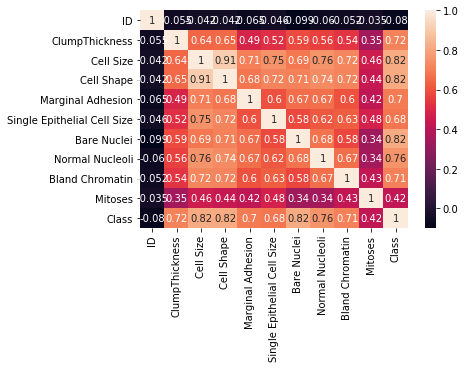

In [155]:
# Check for correlation of variable
corr = df.corr()
sns.heatmap(corr,annot=True)
print('there are many features which has higher correlation, hence we will apply the pca here')

In [156]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

by pairplot looks like Cellsize is related more to cell shape, normal nuclioli, clump thickness 


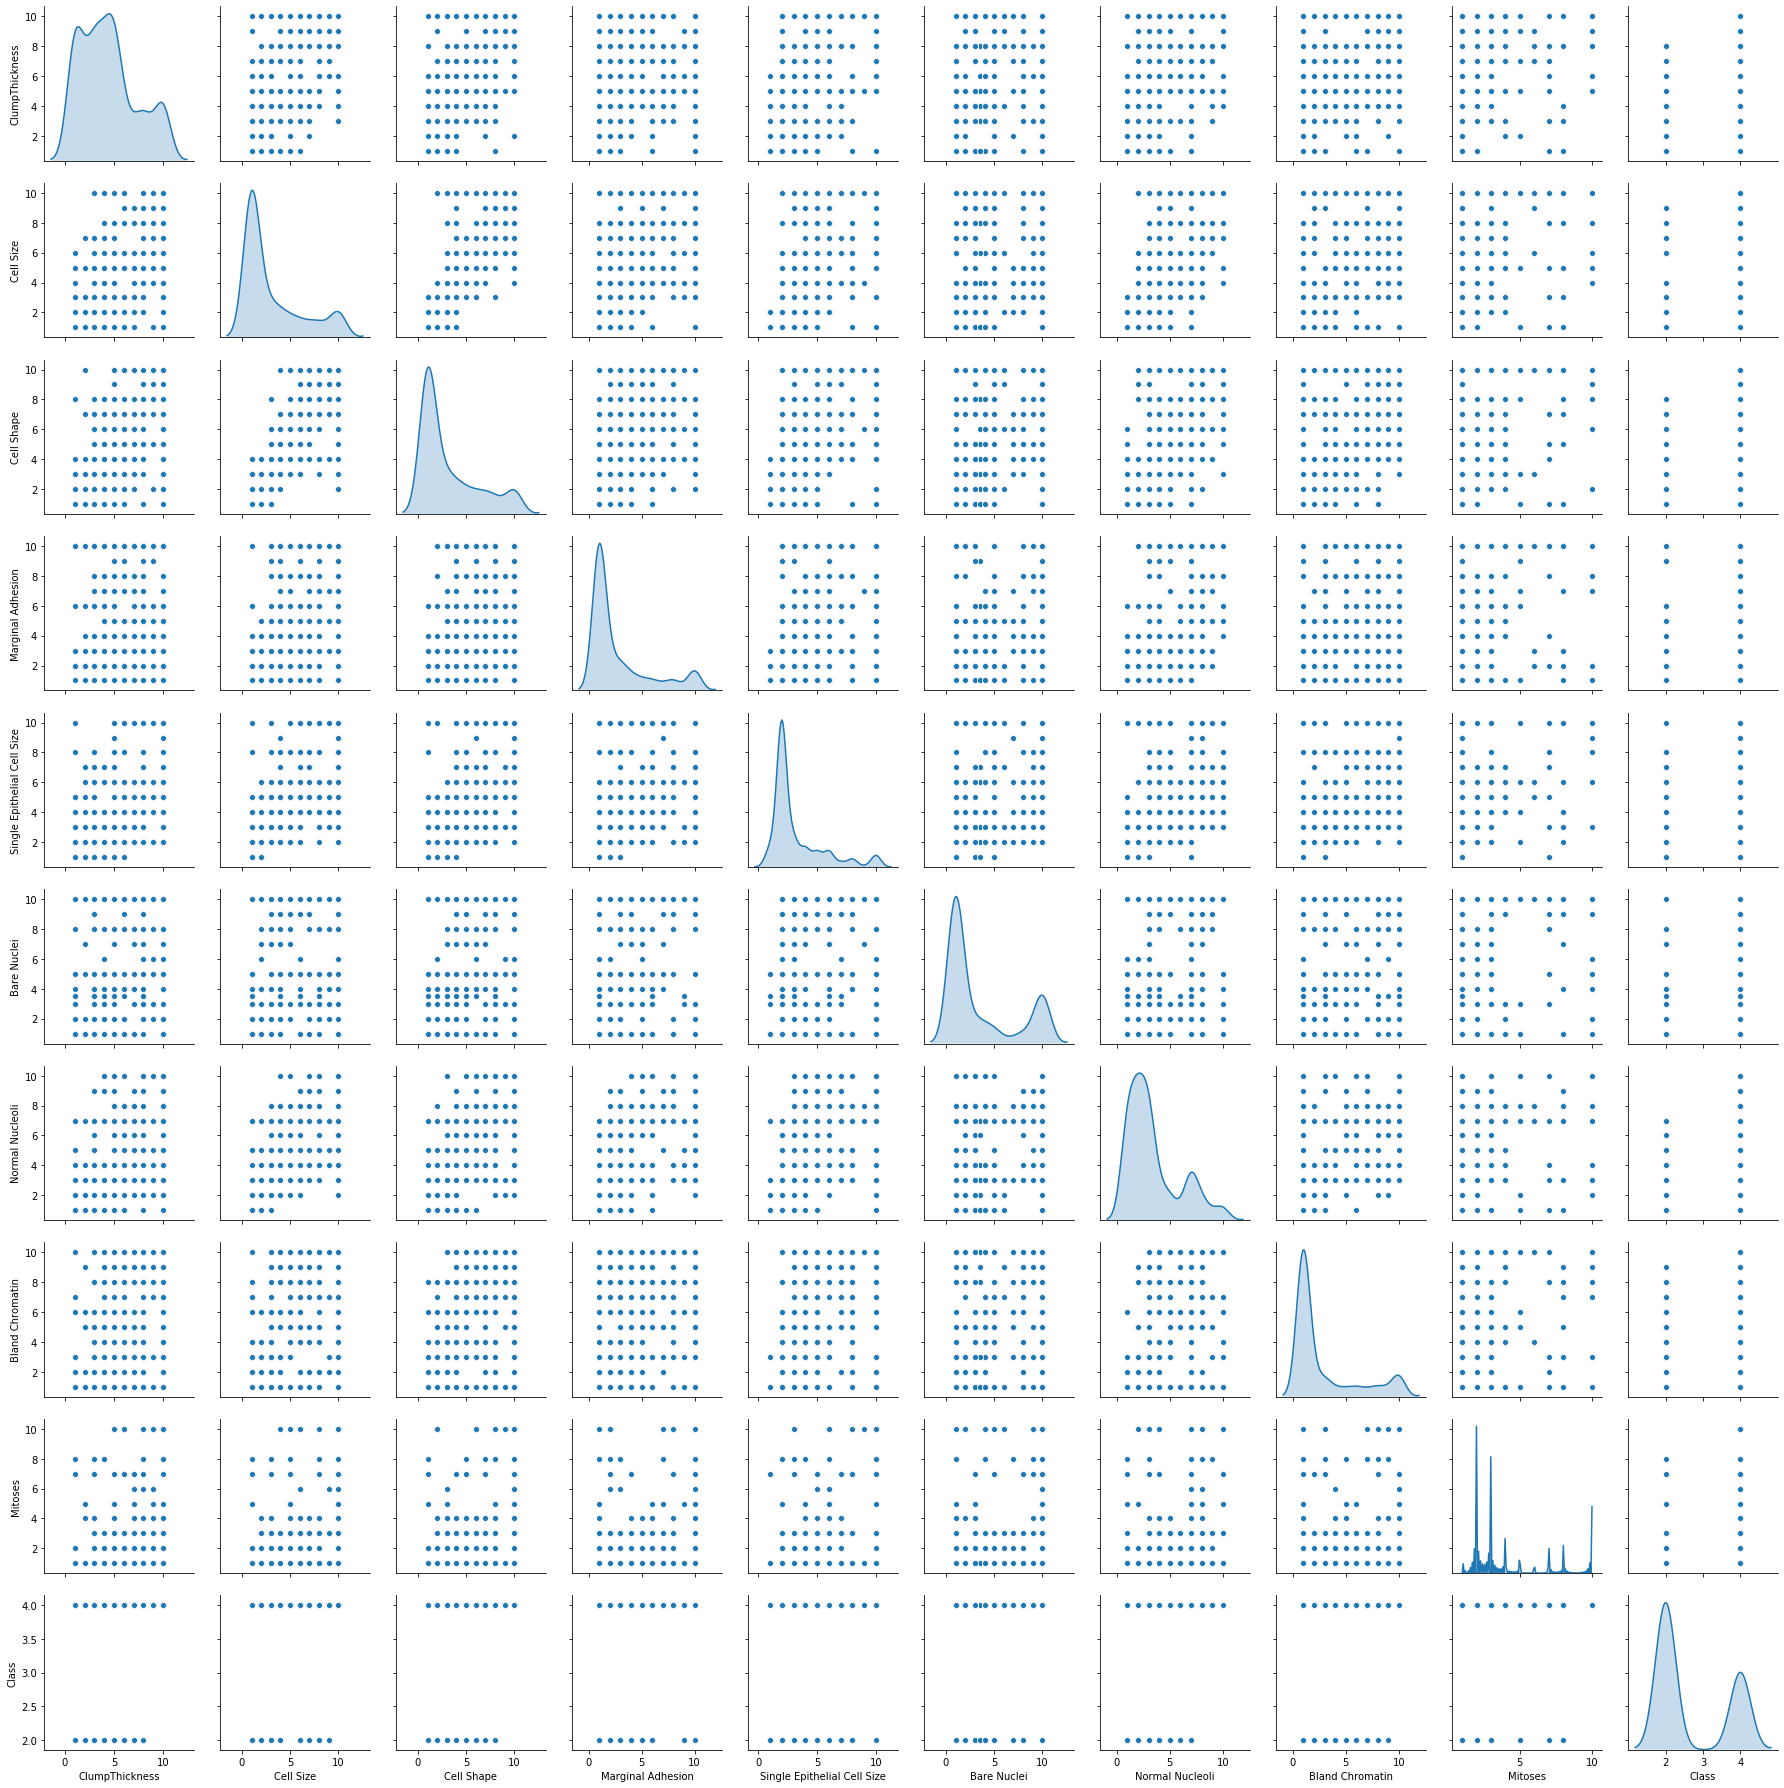

In [157]:
#Let us check for pair plots
df =  df.drop("ID", axis=1)
sns.pairplot(df,diag_kind='kde')
print('by pairplot looks like Cellsize is related more to cell shape, normal nuclioli, clump thickness ')

In [158]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

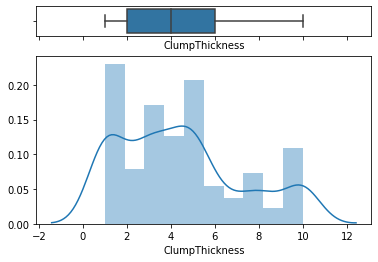

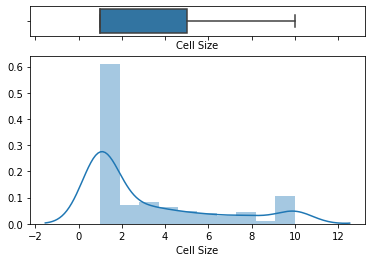

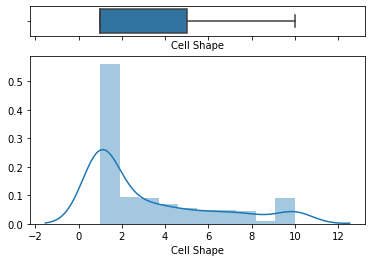

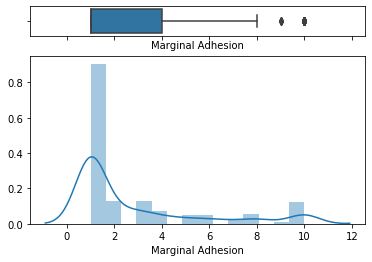

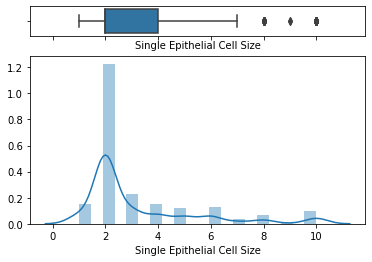

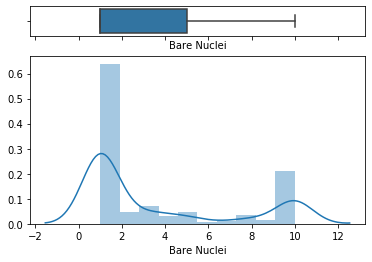

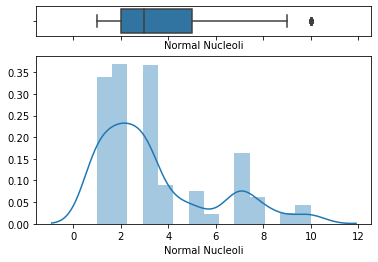

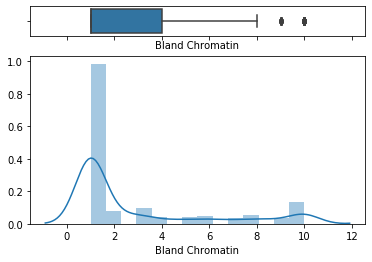

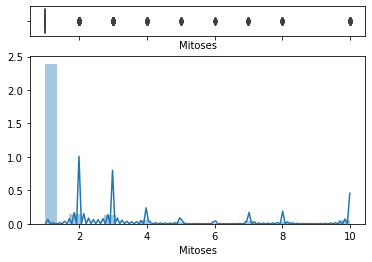

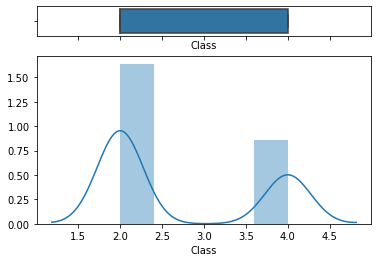

In [159]:
# We could see most of the outliers are now removed.

for feature in df.columns: # Loop through all columns in the dataframe
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(df[feature], ax=ax_box)
    sns.distplot(df[feature], ax=ax_hist)

In [160]:
print('column which has outliers are Marginal Adhesion, Single Epithelial Cell Size, Normal Nucleoli ,Bland Chromatin, Mitoses')
X =  df.drop("Class", axis=1)
y =  df.pop("Class")



column which has outliers are Marginal Adhesion, Single Epithelial Cell Size, Normal Nucleoli ,Bland Chromatin, Mitoses


In [161]:
from scipy.stats import zscore
X = df.apply(zscore)

In [162]:
print('here I have normalized the dataframe.')

here I have normalized the dataframe.


In [163]:
# handling outlier for Marginal Adhesion feature
ma_q3 = X["Marginal Adhesion"].quantile(0.75)
ma_q1 = X["Marginal Adhesion"].quantile(0.25)
ma_iqr = ma_q3-ma_q1 # find out iqr for Marginal Adhesion feature
print("ma_iqr:",ma_iqr)
ma_upper_cutoff = ma_q3+ 1.5*ma_iqr

#capping outlier at upper cutoff for Marginal Adhesion feature
X["Marginal Adhesion"] = X["Marginal Adhesion"].where(X["Marginal Adhesion"]<ma_upper_cutoff,ma_upper_cutoff)

# handling outlier for Single Epithelial Cell Size feature
ma_q3 = X["Single Epithelial Cell Size"].quantile(0.75)
ma_q1 = X["Single Epithelial Cell Size"].quantile(0.25)
ma_iqr = ma_q3-ma_q1 # find out iqr for Marginal Adhesion feature
print("ma_iqr:",ma_iqr)
ma_upper_cutoff = ma_q3+ 1.5*ma_iqr

#capping outlier at upper cutoff for Single Epithelial Cell Size feature
X["Single Epithelial Cell Size"] = X["Single Epithelial Cell Size"].where(X["Single Epithelial Cell Size"]<ma_upper_cutoff,ma_upper_cutoff)

# handling outlier for Bland Chromatin feature
ma_q3 = X["Bland Chromatin"].quantile(0.75)
ma_q1 = X["Bland Chromatin"].quantile(0.25)
ma_iqr = ma_q3-ma_q1 # find out iqr for Marginal Adhesion feature
print("ma_iqr:",ma_iqr)
ma_upper_cutoff = ma_q3+ 1.5*ma_iqr

#capping outlier at upper cutoff for Bland Chromatin feature
X["Bland Chromatin"] = X["Bland Chromatin"].where(X["Bland Chromatin"]<ma_upper_cutoff,ma_upper_cutoff)

# handling outlier for Normal Nucleoli feature
ma_q3 = X["Normal Nucleoli"].quantile(0.75)
ma_q1 = X["Normal Nucleoli"].quantile(0.25)
ma_iqr = ma_q3-ma_q1 # find out iqr for Marginal Adhesion feature
print("ma_iqr:",ma_iqr)
ma_upper_cutoff = ma_q3+ 1.5*ma_iqr

#capping outlier at upper cutoff for Normal Nucleoli feature
X["Normal Nucleoli"] = X["Normal Nucleoli"].where(X["Normal Nucleoli"]<ma_upper_cutoff,ma_upper_cutoff)

# handling outlier for Mitoses feature
ma_q3 = X["Mitoses"].quantile(0.75)
ma_q1 = X["Mitoses"].quantile(0.25)
ma_iqr = ma_q3-ma_q1 # find out iqr for Marginal Adhesion feature
print("ma_iqr:",ma_iqr)
ma_upper_cutoff = ma_q3+ 1.5*ma_iqr

#capping outlier at upper cutoff for Marginal Adhesion feature
X["Mitoses"] = X["Mitoses"].where(X["Mitoses"]<ma_upper_cutoff,ma_upper_cutoff)

ma_iqr: 1.051400874095675
ma_iqr: 0.9038667996413212
ma_iqr: 0.9831395421261719
ma_iqr: 1.2312140096073723
ma_iqr: 0.0


C:\Users\sumans\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sumans\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


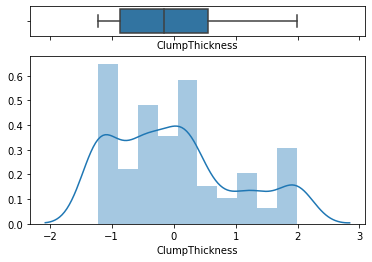

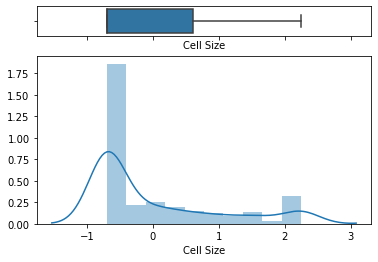

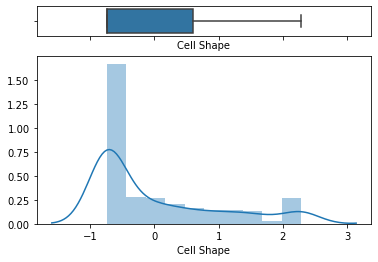

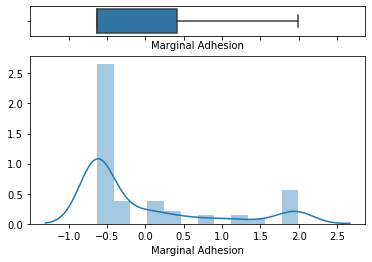

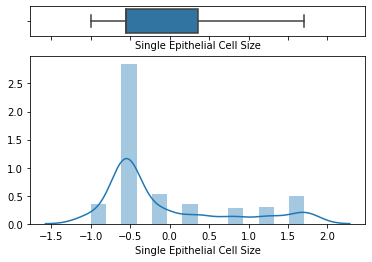

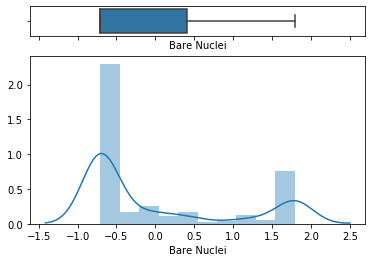

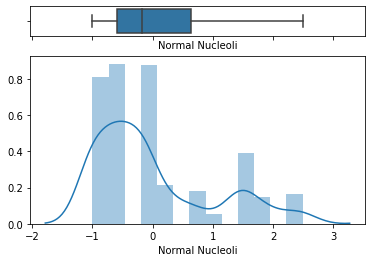

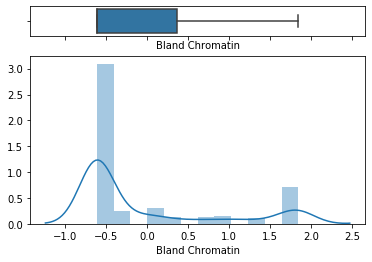

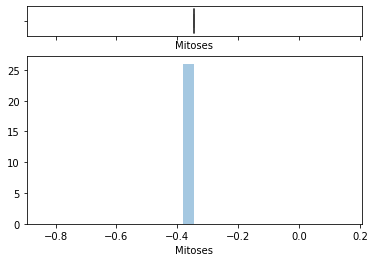

In [164]:
#Again checking for outliers
for feature in X.columns: # Loop through all columns in the dataframe
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    sns.boxplot(X[feature], ax=ax_box)
    sns.distplot(X[feature], ax=ax_hist)

# Q6 Create a covariance matrix for identifying Principal components

In [165]:
# PCA
# Step 1 - Create covariance matrix
cov_matrix = np.cov(X.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00143266e+00  6.45836448e-01  6.55526887e-01  4.49134391e-01
   4.41632248e-01  5.88141154e-01  5.53623197e-01  4.90142094e-01
  -2.26034643e-33]
 [ 6.45836448e-01  1.00143266e+00  9.08181171e-01  6.46891055e-01
   6.30118417e-01  6.87785392e-01  7.45493565e-01  6.52131090e-01
  -8.19375582e-33]
 [ 6.55526887e-01  9.08181171e-01  1.00143266e+00  6.24736638e-01
   6.06343815e-01  7.10622410e-01  7.26128390e-01  6.48408689e-01
  -3.24924800e-33]
 [ 4.49134391e-01  6.46891055e-01  6.24736638e-01  8.07308003e-01
   4.73435490e-01  6.09019153e-01  6.02824561e-01  5.04358336e-01
  -3.95560626e-33]
 [ 4.41632248e-01  6.30118417e-01  6.06343815e-01  4.73435490e-01
   6.44170325e-01  5.03171300e-01  5.18966446e-01  4.93134617e-01
   0.00000000e+00]
 [ 5.88141154e-01  6.87785392e-01  7.10622410e-01  6.09019153e-01
   5.03171300e-01  1.00143266e+00  6.70729248e-01  5.33655928e-01
  -1.35620786e-32]
 [ 5.53623197e-01  7.45493565e-01  7.26128390e-01  6.02824561e-01
   5.1

# Q7 Identify eigen values and eigen vector

In [166]:
# Step 2- Get eigen values and eigen vector

In [167]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print('Eigen Values \n%s', eigenvalues)
print('\n Eigen Vectors \n%s', eigenvectors)

Eigen Values 
%s [5.19359565e+00 5.15095620e-01 4.11106223e-01 8.80458928e-02
 1.90378510e-01 2.97704392e-01 2.62725779e-01 2.74535713e-01
 3.08590265e-33]

 Eigen Vectors 
%s [[ 3.28900497e-01 -9.01425521e-01  1.25832268e-02 -6.39905934e-04
   6.23379968e-02  1.14617748e-01 -2.42615083e-01 -5.66781535e-02
  -9.05686389e-33]
 [ 4.07539069e-01  6.23924837e-02 -2.92613159e-01  7.38048728e-01
  -1.75486719e-01 -2.53978664e-01  6.45078602e-02  3.16573348e-01
   2.67551696e-32]
 [ 4.05391772e-01  7.47961424e-03 -2.40461062e-01 -6.51664352e-01
  -3.74267670e-01 -2.98774172e-01  2.07308344e-01  2.84243861e-01
  -3.43007475e-32]
 [ 3.21408155e-01  3.19020898e-01  2.61439608e-01 -6.13573865e-02
  -1.22614070e-01 -1.64002715e-01 -8.15584332e-01 -1.25292311e-01
  -1.56473128e-32]
 [ 2.93078891e-01  1.24322133e-01 -2.33796073e-01 -1.23704286e-01
   8.64671646e-01 -2.72194045e-01  3.48521936e-02 -7.56577002e-02
  -2.72396541e-32]
 [ 3.63654070e-01  1.07995580e-02  7.62225414e-01  8.47566876e-02
   

# Q8 Find variance and cumulative variance by each eigen vector

In [168]:
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[ :, i]) for i in range(len(eigenvalues))]
eigen_pairs_sorted=sorted(eigen_pairs,reverse=True)
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Variance Explained", var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Variance Explained [71.8023063641877, 7.121280906892288, 5.683610538312198, 4.115811739441582, 3.795500983333158, 3.6322267189603386, 2.6320139300447103, 1.2172488188280186, 4.266310712134029e-32]
Cumulative Variance Explained [ 71.80230636  78.92358727  84.60719781  88.72300955  92.51851053
  96.15073725  98.78275118 100.         100.        ]


ValueError: shape mismatch: objects cannot be broadcast to a single shape

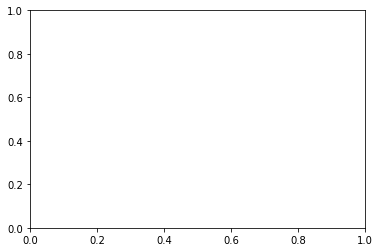

In [169]:
plt.bar(range(1,8), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,8),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [173]:
P_reduce = np.array(eigen_pairs_sorted[0:9]).transpose()

In [174]:
X_std_4D = np.dot(X,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

# Q10 Find correlation between components and features

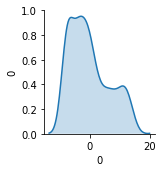

In [175]:
sns.pairplot(Proj_data_df, diag_kind='kde') 

# Content Based Recommendation System - Optional ( Q11 - Q19 will not be graded)

# Q11 Read the Dataset `movies_metadata.csv`

# Q12 Create a new column with name 'description' combining `'overview' and 'tagline'` columns in the given dataset

# Q13  Lets drop the null values in `description` column

# Q14 Keep the first occurance and drop duplicates of each title in column `title`

# Q15   As we might have dropped a few rows with duplicate `title` in above step, just reset the index [make sure you are not adding any new column to the dataframe while doing reset index]

# Q16    Generate tf-idf matrix using the column `description`. Consider till 3-grams, with minimum document frequency as 0.

Hint:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1, 3), min_df=0, stop_words='english')

# Q17  Create cosine similarity matrix

# Q18  Write a function with name `recommend` which takes `title` as argument and returns a list of 10 recommended title names in the output based on the above cosine similarities

Hint:

titles = df['title'] <br>
indices = pd.Series(df.index, index=df['title']) <br>

def recommend(title): <br>
    idx = indices[title] <br>
    sim_scores = list(enumerate(cosine_similarities[idx])) <br>
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) <br>
    sim_scores = sim_scores[1:31] <br>
    movie_indices = [i[0] for i in sim_scores] <br>
    return titles.iloc[movie_indices] <br>

# Q19 Give the recommendations from above functions for movies `The Godfather` and `The Dark Knight Rises`

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q20 Read the dataset(jokes.csv)

Take care about the header in read_csv() as there are no column names given in the dataset. 

In [176]:
jokesdf = pd.read_csv('jokes.csv')

# Q21 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [178]:
ratings = jokesdf[:200]

# Q22 Change the column indices from 0 to 99

In [182]:
ratings.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,48,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q23 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [181]:
ratings = ratings.replace(99,0)

# Q24 Normalize the ratings using StandardScaler and save them in `ratings_diff` variable

In [191]:
sc = StandardScaler()
ratings_diff =  sc.fit_transform(ratings)      
ratings_diff = pd.DataFrame(ratings_diff)

### Popularity based recommendation system

# Q25  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [194]:
mean=[]
for column in ratings_diff:
    mean.append(ratings_diff[column].mean())

In [211]:
column_names = ["joke", "mean"]
df_with_mean = pd.DataFrame(columns = column_names)
for column in ratings_diff:
    df_with_mean = df_with_mean.append({'joke' : ratings_diff[column] , 'mean' : ratings_diff[column].mean()} , ignore_index=True)

In [214]:
df_with_mean.sort_values(by='mean', ascending=False).head(10)

,joke,mean
99,0 -0.041444 1 -1.367650 2 -0.04144...,1.840889e-16
82,0 -2.441033 1 1.384279 2 -0.09167...,1.243450e-16
98,0 -0.026858 1 0.070600 2 -0.02685...,1.198694e-16
21,0 -2.453942 1 -0.347704 2 0.97075...,1.065814e-16
95,0 -0.175922 1 -0.233389 2 -0.17592...,1.054712e-16
93,0 -0.362193 1 -0.453066 2 -0.36219...,8.770762e-17
48,0 -0.297410 1 -0.460992 2 1.18480...,7.771561e-17
74,0 0.133933 1 2.679258 2 0.13393...,7.743806e-17
100,0 -0.160954 1 0.167461 2 -0.16095...,7.549517e-17
50,0 0.019088 1 -0.106289 2 0.82508...,7.494005e-17
